In [1]:
import matlab.engine
eng = matlab.engine.start_matlab()

https://www.mathworks.com/help/matlab/matlab_external/handle-data-returned-from-matlab-to-python.html
https://www.mathworks.com/help/matlab/matlab_external/matlab-arrays-as-python-variables.html
https://stackoverflow.com/questions/34155829/how-to-efficiently-convert-matlab-engine-arrays-to-numpy-ndarray

Successfully called MATLAB function imread, which accepts a filename string and returns a MATLAB array.

<IPython.core.display.Javascript object>


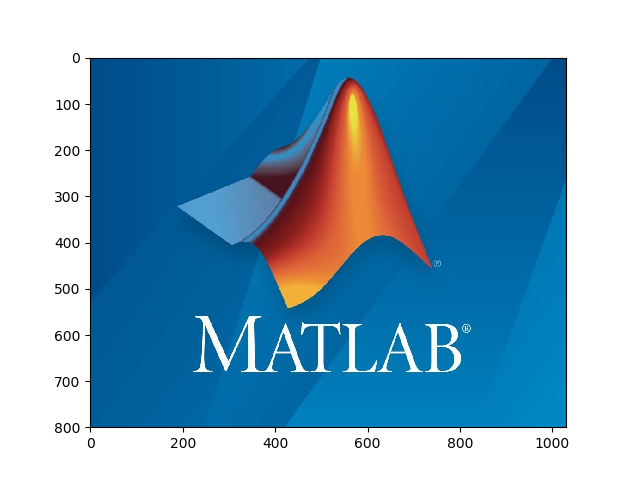

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def numpyfy_MATLABarray(matlab_array):
    return np.array(matlab_array._data).reshape(matlab_array.size, order='F')

filename = 'test.jpg'
im = eng.imread(filename)
np_im = numpyfy_MATLABarray(im)
%matplotlib notebook
plt.imshow(np_im)
plt.show()

Getting marquee box coordinates in python and passing in ROI coordinates back into MATLAB using MATLAB's min function as an example.

In [16]:
import cv2
def get_bounding_box_coords(im):    
    coords = cv2.selectROI(im, showCrosshair = False, fromCenter = False)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return coords

coords = get_bounding_box_coords(np_im) #select rectangle then press Enter twice
print(coords)
eng.min(matlab.int16(coords)) #eng.min(coords) throws an error, because the min function accepts only matlab.array objects

(475, 162, 229, 174)


162

Python can parse MATLAB structs which contain arrays, floats, strings, and bools. It will be necessary to convert numpyfy arrays though.

In [21]:
eng.eval('test_struct.name = \'foo\'', nargout = 0)
eng.eval('test_struct.bool = true', nargout = 0)
eng.eval('test_struct.array = [1,2,2]', nargout = 0)
eng.workspace['test_struct']

{'name': 'foo', 'bool': True, 'array': matlab.double([[1.0,2.0,2.0]])}

Looks like interactive plots might work. A MATLAB plot window appears after running the cell below. 

In [2]:
eng.plot(1,2)